### Grabbing Gear

In [1]:
import warnings
warnings.filterwarnings("ignore")

# The norms
import pandas as pd
import numpy as np

# Viz libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # scatter matrix
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import telco_acquire

# Algorithms libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = telco_acquire.get_telco_data()
df.head(10)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)
5,1,1,1,0067-DKWBL,Male,1,No,No,2,Yes,...,No,No,No,Yes,49.25,91.1,Yes,Month-to-month,DSL,Electronic check
6,2,1,1,0076-LVEPS,Male,0,No,Yes,29,No,...,Yes,No,No,Yes,45.00,1242.45,No,Month-to-month,DSL,Mailed check
7,2,1,1,0082-LDZUE,Male,0,No,No,1,Yes,...,No,No,No,Yes,44.30,44.3,No,Month-to-month,DSL,Mailed check
8,1,1,1,0096-BXERS,Female,0,Yes,No,6,Yes,...,No,No,No,No,50.35,314.55,No,Month-to-month,DSL,Electronic check
9,2,1,1,0096-FCPUF,Male,0,No,No,30,Yes,...,No,No,Yes,Yes,64.50,1888.45,No,Month-to-month,DSL,Mailed check


### Putting the First Functions from 'telco_acquire' To Work

In [3]:
df = telco_acquire.fill_na(df) 
df = telco_acquire.phone_lines(df)
df = telco_acquire.partner_dependents(df)
df = telco_acquire.drop_columns(df)
df

,customer_id,gender,senior_citizen,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line,partner_and_dependents
0,0003-MKNFE,Male,0,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check,2,0
1,0013-MHZWF,Female,0,No,No,No,Yes,Yes,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic),1,2
2,0015-UOCOJ,Female,1,Yes,No,No,No,No,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check,1,0
3,0023-HGHWL,Male,1,No,No,No,No,No,No,Yes,25.10,25.1,Yes,Month-to-month,DSL,Electronic check,0,0
4,0032-PGELS,Female,0,Yes,No,No,No,No,No,No,30.50,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic),0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9950-MTGYX,Male,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,20.30,487.95,No,Two year,None,Credit card (automatic),1,3
7039,9953-ZMKSM,Male,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.25,1559.3,No,Two year,None,Mailed check,2,0
7040,9964-WBQDJ,Female,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,24.40,1725.4,No,Two year,None,Credit card (automatic),2,1
7041,9972-EWRJS,Female,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.25,1372.9,No,Two year,None,Bank transfer (automatic),1,3


#### Checking to see if the functions (thus far) are working

In [8]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'phone_and_multi_line', 'partner_and_dependents'],
      dtype='object')

In [10]:
df.info()

# No encoding or imputing yet - just raw df data with the applied table changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
customer_id               7043 non-null object
gender                    7043 non-null object
senior_citizen            7043 non-null int64
online_security           7043 non-null object
online_backup             7043 non-null object
device_protection         7043 non-null object
tech_support              7043 non-null object
streaming_tv              7043 non-null object
streaming_movies          7043 non-null object
paperless_billing         7043 non-null object
monthly_charges           7043 non-null float64
total_charges             7032 non-null object
churn                     7043 non-null object
contract_type             7043 non-null object
internet_service_type     7043 non-null object
payment_type              7043 non-null object
phone_and_multi_line      7043 non-null int64
partner_and_dependents    7043 non-null int64
dtypes: float64(1), int64(3), object(14)
memory u

In [11]:
df.shape

(7043, 18)

In [23]:
df.streaming_tv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

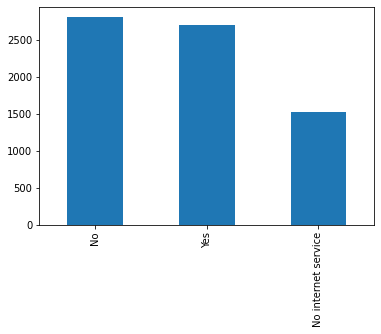

In [26]:
df.streaming_tv.value_counts().plot(kind= "bar")

In [37]:
df.streaming_movies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [38]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [39]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [40]:
df.partner_and_dependents.value_counts()

0    3280
3    1749
1    1653
2     361
Name: partner_and_dependents, dtype: int64

In [41]:
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [42]:
df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [43]:
df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [36]:
df.paperless_billing.value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [46]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [47]:
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [48]:
df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [49]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [51]:
df.phone_and_multi_line.value_counts()

1    3390
2    2971
0     682
Name: phone_and_multi_line, dtype: int64

In [52]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### Key Takeaways: 

- Data is split nearly perfectly in half between male & female (50.5% M, 49.5% F)
- Only 16% of the customers are senior citizens
- 71% don't use online security
- 66% of customers do NOT have online backup (at least, not through this company)
- 34% have device protection
- 29% have / use tech support
- 62% of the customers are not streaming tv
- 61% are NOT streaming movies
- 59% use paperless billing
- 55% of customers are on a month-to-month plan, 24% are on 2-yr, 21% on 1-yr contracts
- 44% have Fiberoptic internet service, 34% DSL, and 22% don't even have it
- 43% are on autopay (22% from account, 21% credit card), 34% pay by electronic check, and 23% still mail in their payments
- 48% have phone lines, 42% have multiple phone lines, and 10% have neither (cellphone?)
- 47% of customers are single, 25% are married w/ kids, 23% are partnered w/o kids, and 5% are single parents

#### Re-iterating STL Concern:

**Why are we losing 27% of our customers to churn, and keeping only 73%?**